In [248]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [249]:
df = pd.read_csv('/Users/avishekhimanshu/Downloads/titanic/train.csv')
df =df.drop(['PassengerId'],axis=1)
test= pd.read_csv('/Users/avishekhimanshu/Downloads/titanic/test.csv')

In [250]:
# Missing - Age,Cabin,embarked
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 76.7+ KB


In [251]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [252]:
df['Age'] = df['Age'].fillna(df['Age'].mean())

In [253]:
test['Age'] = test['Age'].fillna(test['Age'].mean())

In [254]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 76.7+ KB


In [255]:
df.drop('Cabin',inplace=True,axis=1)

In [256]:
df.drop('Fare',inplace=True,axis=1)

In [257]:
df.drop('Name',inplace=True,axis=1)

In [258]:
df['Embarked'] = df['Embarked'].fillna('S')

In [259]:
test.drop('Cabin',inplace=True,axis=1)
test.drop('Fare',inplace=True,axis=1)
test.drop('Name',inplace=True,axis=1)
test['Embarked'] = test['Embarked'].fillna('S')

In [260]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Ticket    891 non-null    object 
 7   Embarked  891 non-null    object 
dtypes: float64(1), int64(4), object(3)
memory usage: 55.8+ KB


<AxesSubplot:>

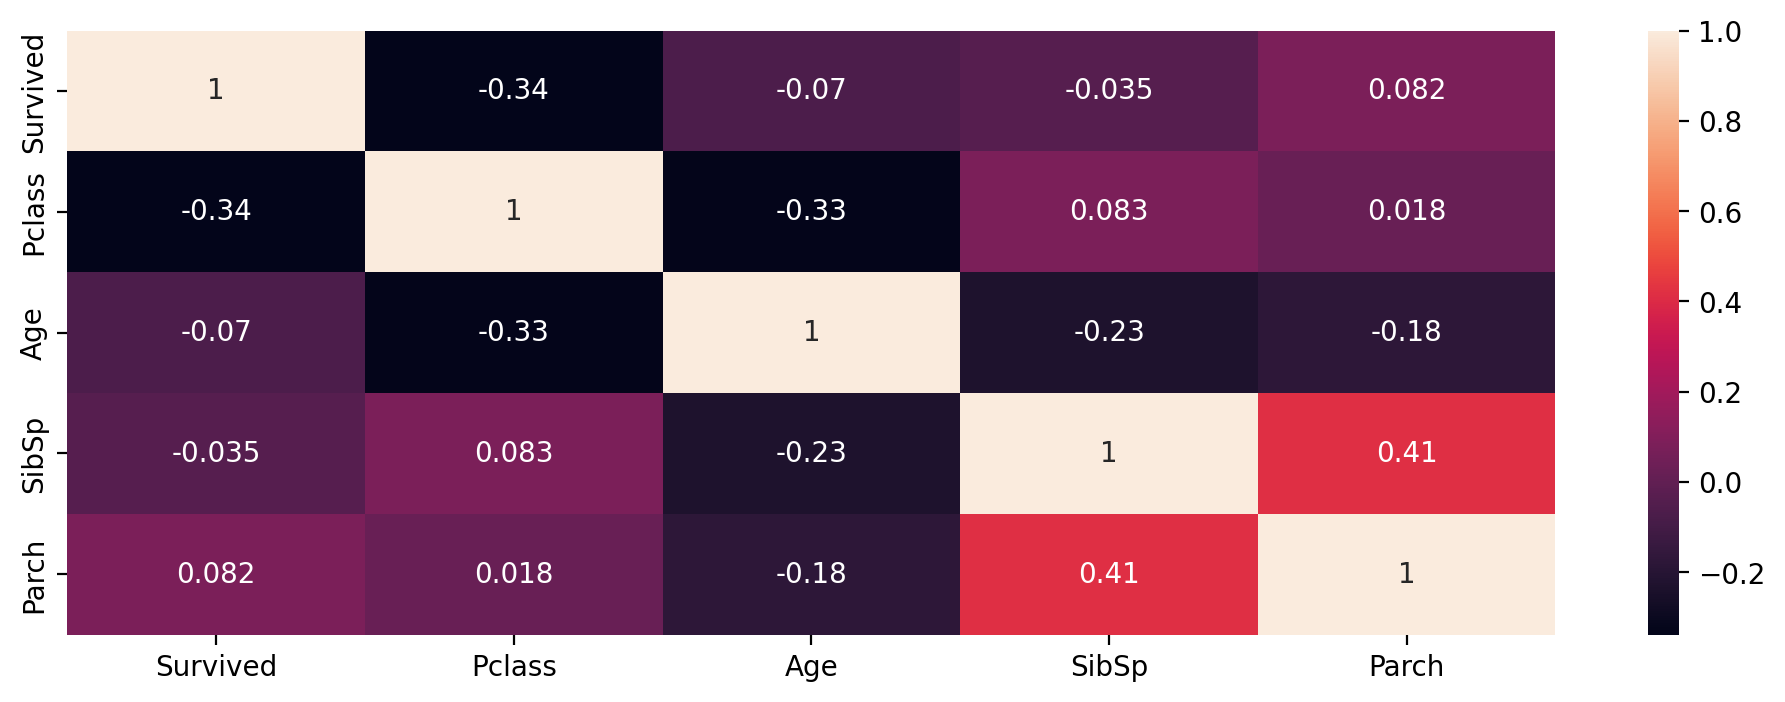

In [261]:
plt.figure(figsize=(12,4),dpi=200)
sns.heatmap(df.corr(),annot=True)

/Users/avishekhimanshu/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

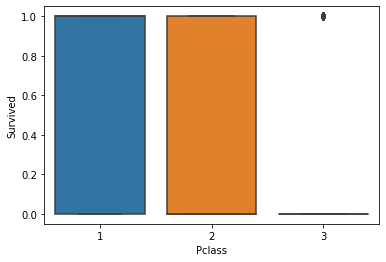

In [262]:
sns.boxplot('Pclass','Survived',data=df)

In [263]:
mymap = {'male':1,'female':0}
df['Sex']=df['Sex'].map(mymap)
mymap2 = {'S':0,'Q':1,'C':3}
df['Embarked']=df['Embarked'].map(mymap2)

In [264]:
test['Sex']=test['Sex'].map(mymap)
test['Embarked']=test['Embarked'].map(mymap2)

In [265]:
test.drop('Ticket',axis=1,inplace=True)

In [266]:
df.drop('Ticket',axis=1,inplace=True)

In [267]:
from sklearn.model_selection import train_test_split
X = df.drop('Survived',axis=1)
y=df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [268]:
X_train.head()

,Pclass,Sex,Age,SibSp,Parch,Embarked
165,3,1,9.000000,0,2,0
541,3,0,9.000000,4,2,0
625,1,1,61.000000,0,0,0
388,3,1,29.699118,0,0,1
76,3,1,29.699118,0,0,0


In [269]:
from sklearn.linear_model import LogisticRegressionCV,LogisticRegression
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [270]:
from sklearn.model_selection import GridSearchCV
logmodel = LogisticRegression(solver='saga',multi_class="ovr",max_iter=50000)

In [271]:
penalty = ['l1', 'l2','elasticnet']
C = np.logspace(0, 4, 10)
grid_model = GridSearchCV(estimator=logmodel,param_grid={'C':C,'penalty':penalty})

In [272]:
grid_model.fit(X_train,y_train)

/Users/avishekhimanshu/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
50 fits failed out of a total of 150.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
50 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/avishekhimanshu/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/avishekhimanshu/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 1471, in fit
    raise ValueError(
ValueError: l1_ratio must be between 0 and 1; got (l1_ratio=None)

  warnings.warn(some_fits_failed_message, FitFail

GridSearchCV(estimator=LogisticRegression(max_iter=50000, multi_class='ovr',
                                          solver='saga'),
             param_grid={'C': array([1.00000000e+00, 2.78255940e+00, 7.74263683e+00, 2.15443469e+01,
       5.99484250e+01, 1.66810054e+02, 4.64158883e+02, 1.29154967e+03,
       3.59381366e+03, 1.00000000e+04]),
                         'penalty': ['l1', 'l2', 'elasticnet']})

In [273]:
y_pred = grid_model.predict(X_test)

In [274]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,plot_confusion_matrix

In [275]:
accuracy_score(y_test,y_pred)

0.8333333333333334

In [276]:
confusion_matrix(y_test,y_pred)

array([[45,  9],
       [ 6, 30]])

/Users/avishekhimanshu/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


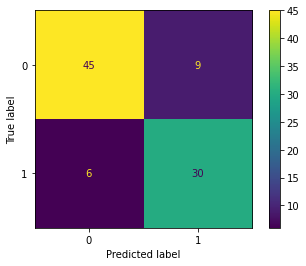

In [277]:
plot_confusion_matrix(grid_model,X_test,y_test)

In [278]:
test = test.drop('PassengerId',axis=1)

In [279]:
test = scaler.transform(test)
final_y= grid_model.predict(test)

In [280]:
submission= pd.read_csv('/Users/avishekhimanshu/Downloads/titanic/gender_submission.csv')
passengerid = submission['PassengerId']
test_y = submission.drop('PassengerId',axis=1)
accuracy_score(test_y,final_y)

0.9473684210526315

In [281]:
ser = pd.Series(data=final_y)
final_df = pd.concat([passengerid,ser],axis=1)
# final_df['Survived'] = final_y
final_df

,PassengerId,0
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [282]:
final_df.to_csv('titanic-submission.csv',index=False)